# Data Pre-Processing

# importing data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pickle

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("technika148/football-database")

print("Path to dataset files:", path)

Path to dataset files: /home/leoadmin/.cache/kagglehub/datasets/technika148/football-database/versions/1


In [4]:
import os

In [5]:
dir_list = os.listdir(path) 
   
print("Files and directories in '", path, "' :")  
   
# print the list 
print(dir_list)

Files and directories in ' /home/leoadmin/.cache/kagglehub/datasets/technika148/football-database/versions/1 ' :
['leagues.csv', 'teamstats.csv', 'teams.csv', 'shots.csv', 'players.csv', 'appearances.csv', 'games.csv']


# Creating data frames from data

In [6]:
# Get all CSV files in the directory
csv_files = [f for f in os.listdir(path) if f.endswith('.csv')]

# Create a dictionary to store DataFrames
dfs = {}

# Load each CSV file into a DataFrame
for file in csv_files:
    file_path = os.path.join(path, file)
    df_name = file.replace(".csv", "")  # Use filename (without .csv) as the dictionary key
    dfs[df_name] = pd.read_csv(file_path, encoding='latin1')

# Display keys (i.e., names of loaded DataFrames)
print("Loaded DataFrames:", dfs.keys())

Loaded DataFrames: dict_keys(['leagues', 'teamstats', 'teams', 'shots', 'players', 'appearances', 'games'])


In [7]:
display(dfs['appearances'].head())
display(dfs['appearances'].info())

,gameID,playerID,goals,ownGoals,shots,xGoals,xGoalsChain,xGoalsBuildup,assists,keyPasses,xAssists,position,positionOrder,yellowCard,redCard,time,substituteIn,substituteOut,leagueID
0,81,560,0,0,0,0.0,0.000000,0.000000,0,0,0.000000,GK,1,0,0,90,0,0,1
1,81,557,0,0,0,0.0,0.106513,0.106513,0,1,0.106513,DR,2,0,0,82,222605,0,1
2,81,548,0,0,0,0.0,0.127738,0.127738,0,0,0.000000,DC,3,0,0,90,0,0,1
3,81,628,0,0,0,0.0,0.106513,0.106513,0,0,0.000000,DC,3,0,0,90,0,0,1
4,81,1006,0,0,0,0.0,0.021225,0.021225,0,0,0.000000,DL,4,0,0,90,0,0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356513 entries, 0 to 356512
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   gameID         356513 non-null  int64  
 1   playerID       356513 non-null  int64  
 2   goals          356513 non-null  int64  
 3   ownGoals       356513 non-null  int64  
 4   shots          356513 non-null  int64  
 5   xGoals         356513 non-null  float64
 6   xGoalsChain    356513 non-null  float64
 7   xGoalsBuildup  356513 non-null  float64
 8   assists        356513 non-null  int64  
 9   keyPasses      356513 non-null  int64  
 10  xAssists       356513 non-null  float64
 11  position       356513 non-null  object 
 12  positionOrder  356513 non-null  int64  
 13  yellowCard     356513 non-null  int64  
 14  redCard        356513 non-null  int64  
 15  time           356513 non-null  int64  
 16  substituteIn   356513 non-null  int64  
 17  substituteOut  356513 non-nul

None

In [8]:
display(dfs['games'].head())
display(dfs['games'].info())

,gameID,leagueID,season,date,homeTeamID,awayTeamID,homeGoals,awayGoals,homeProbability,drawProbability,...,PSA,WHH,WHD,WHA,VCH,VCD,VCA,PSCH,PSCD,PSCA
0,81,1,2015,2015-08-08 15:45:00,89,82,1,0,0.2843,0.3999,...,5.90,1.62,3.6,6.00,1.67,4.00,5.75,1.64,4.07,6.04
1,82,1,2015,2015-08-08 18:00:00,73,71,0,1,0.3574,0.3500,...,4.27,1.91,3.5,4.00,2.00,3.50,4.20,1.82,3.88,4.70
2,83,1,2015,2015-08-08 18:00:00,72,90,2,2,0.2988,0.4337,...,5.62,1.73,3.5,5.00,1.73,3.90,5.40,1.75,3.76,5.44
3,84,1,2015,2015-08-08 18:00:00,75,77,4,2,0.6422,0.2057,...,4.34,2.00,3.1,2.70,2.00,3.40,4.33,1.79,3.74,5.10
4,85,1,2015,2015-08-08 18:00:00,79,78,1,3,0.1461,0.2159,...,3.08,2.60,3.1,2.88,2.60,3.25,3.00,2.46,3.39,3.14


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12680 entries, 0 to 12679
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gameID             12680 non-null  int64  
 1   leagueID           12680 non-null  int64  
 2   season             12680 non-null  int64  
 3   date               12680 non-null  object 
 4   homeTeamID         12680 non-null  int64  
 5   awayTeamID         12680 non-null  int64  
 6   homeGoals          12680 non-null  int64  
 7   awayGoals          12680 non-null  int64  
 8   homeProbability    12680 non-null  float64
 9   drawProbability    12680 non-null  float64
 10  awayProbability    12680 non-null  float64
 11  homeGoalsHalfTime  12680 non-null  int64  
 12  awayGoalsHalfTime  12680 non-null  int64  
 13  B365H              12675 non-null  float64
 14  B365D              12675 non-null  float64
 15  B365A              12675 non-null  float64
 16  BWH                126

None

In [9]:
display(dfs['leagues'].head())
display(dfs['leagues'].info())

,leagueID,name,understatNotation
0,1,Premier League,EPL
1,2,Serie A,Serie_A
2,3,Bundesliga,Bundesliga
3,4,La Liga,La_liga
4,5,Ligue 1,Ligue_1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   leagueID           5 non-null      int64 
 1   name               5 non-null      object
 2   understatNotation  5 non-null      object
dtypes: int64(1), object(2)
memory usage: 248.0+ bytes


None

In [10]:
display(dfs['players'].head())
display(dfs['players'].info())

,playerID,name
0,560,Sergio Romero
1,557,Matteo Darmian
2,548,Daley Blind
3,628,Chris Smalling
4,1006,Luke Shaw


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7659 entries, 0 to 7658
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   playerID  7659 non-null   int64 
 1   name      7659 non-null   object
dtypes: int64(1), object(1)
memory usage: 119.8+ KB


None

In [11]:
display(dfs['teams'].head())
display(dfs['teams'].info())

,teamID,name
0,71,Aston Villa
1,72,Everton
2,74,Southampton
3,75,Leicester
4,76,West Bromwich Albion


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   teamID  146 non-null    int64 
 1   name    146 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


None

In [12]:
display(dfs['shots'].head())
display(dfs['shots'].info())

,gameID,shooterID,assisterID,minute,situation,lastAction,shotType,shotResult,xGoal,positionX,positionY
0,81,554,NaN,27,DirectFreekick,Standard,LeftFoot,BlockedShot,0.104347,0.794,0.421
1,81,555,631.0,27,SetPiece,Pass,RightFoot,BlockedShot,0.064342,0.860,0.627
2,81,554,629.0,35,OpenPlay,Pass,LeftFoot,BlockedShot,0.057157,0.843,0.333
3,81,554,NaN,35,OpenPlay,Tackle,LeftFoot,MissedShots,0.092141,0.848,0.533
4,81,555,654.0,40,OpenPlay,BallRecovery,RightFoot,BlockedShot,0.035742,0.812,0.707


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324543 entries, 0 to 324542
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   gameID      324543 non-null  int64  
 1   shooterID   324543 non-null  int64  
 2   assisterID  240199 non-null  float64
 3   minute      324543 non-null  int64  
 4   situation   324543 non-null  object 
 5   lastAction  324543 non-null  object 
 6   shotType    324543 non-null  object 
 7   shotResult  324543 non-null  object 
 8   xGoal       324543 non-null  float64
 9   positionX   324543 non-null  float64
 10  positionY   324543 non-null  float64
dtypes: float64(4), int64(3), object(4)
memory usage: 27.2+ MB


None

In [13]:
display(dfs['teamstats'].head())
display(dfs['teamstats'].info())

,gameID,teamID,season,date,location,goals,xGoals,shots,shotsOnTarget,deep,ppda,fouls,corners,yellowCards,redCards,result
0,81,89,2015,2015-08-08 15:45:00,h,1,0.627539,9,1,4,13.8261,12,1,2.0,0,W
1,81,82,2015,2015-08-08 15:45:00,a,0,0.674600,9,4,10,8.2188,12,2,3.0,0,L
2,82,73,2015,2015-08-08 18:00:00,h,0,0.876106,11,2,11,6.9000,13,6,3.0,0,L
3,82,71,2015,2015-08-08 18:00:00,a,1,0.782253,7,3,2,11.8462,13,3,4.0,0,W
4,83,72,2015,2015-08-08 18:00:00,h,2,0.604226,10,5,5,6.6500,7,8,1.0,0,D


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25360 entries, 0 to 25359
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gameID         25360 non-null  int64  
 1   teamID         25360 non-null  int64  
 2   season         25360 non-null  int64  
 3   date           25360 non-null  object 
 4   location       25360 non-null  object 
 5   goals          25360 non-null  int64  
 6   xGoals         25360 non-null  float64
 7   shots          25360 non-null  int64  
 8   shotsOnTarget  25360 non-null  int64  
 9   deep           25360 non-null  int64  
 10  ppda           25360 non-null  float64
 11  fouls          25360 non-null  int64  
 12  corners        25360 non-null  int64  
 13  yellowCards    25359 non-null  float64
 14  redCards       25360 non-null  int64  
 15  result         25360 non-null  object 
dtypes: float64(3), int64(10), object(3)
memory usage: 3.1+ MB


None

In [14]:
dfs['appearances']['positionOrder'].value_counts()

17    77563
3     56289
9     44453
15    34094
1     25358
4     20559
2     20556
7     16903
12    13542
10     8390
8      8389
11     6923
13     6923
14     5211
16     5211
5      3075
6      3074
Name: positionOrder, dtype: int64

# Having a look into the dfs

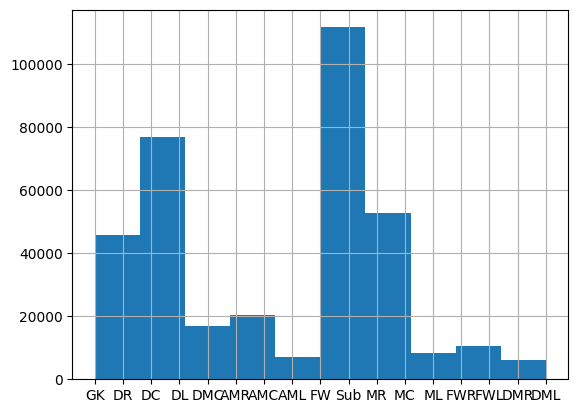

In [15]:
#dfs['appearances']['positionOrder'].hist()
dfs['appearances']['position'].hist()
plt.show()

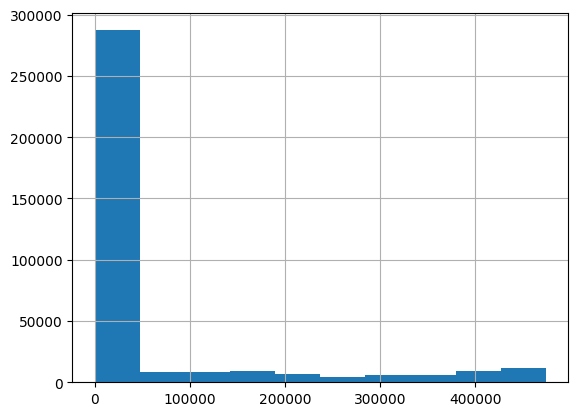

In [16]:
dfs['appearances']['substituteIn'].hist()
plt.show()

In [17]:
display(dfs['appearances']['substituteOut'].value_counts())

0         278954
316647         1
317386         1
317387         1
317382         1
           ...  
33206          1
33209          1
33186          1
33194          1
474074         1
Name: substituteOut, Length: 77560, dtype: int64

In [18]:
display(dfs['appearances']['substituteIn'].value_counts())

0         278954
316652         1
317393         1
317391         1
317392         1
           ...  
33210          1
33212          1
33197          1
33196          1
474075         1
Name: substituteIn, Length: 77560, dtype: int64

In [19]:
display(dfs['appearances'][['gameID','playerID','substituteIn','substituteOut','time']])

,gameID,playerID,substituteIn,substituteOut,time
0,81,560,0,0,90
1,81,557,222605,0,82
2,81,548,0,0,90
3,81,628,0,0,90
4,81,1006,0,0,90
...,...,...,...,...,...
356508,16135,3509,0,0,90
356509,16135,4882,0,0,90
356510,16135,5786,0,0,90
356511,16135,8997,474075,0,78


changing the logic of substitute in/out and repalcing it to be binary

In [20]:
# 1. Drop the 'position' column
df_appearances = dfs['appearances'].drop(columns=['position'])

# 2. Create binary columns from 'substituteIn' and 'substituteOut'
df_appearances['subOut'] = df_appearances['substituteIn'].apply(
    lambda x: 1 if x not in [None, '', 0] else 0
)
df_appearances['subIn'] = df_appearances['substituteOut'].apply(
    lambda x: 1 if x not in [None, '', 0] else 0
)

# 3. Drop the original 'substituteIn' and 'substituteOut' columns
df_appearances.drop(columns=['substituteIn', 'substituteOut'], inplace=True)

# Now df_appearances retains the 'positionOrder' (and any other columns except 'position')

In [21]:
# Get current column order
cols = list(df_appearances.columns)

# Remove subOut, subIn from wherever they currently are
cols.remove('subOut')
cols.remove('subIn')

# Find positions of 'time' and 'leagueID'
pos_time = cols.index('time')
pos_league = cols.index('leagueID')

# Insert subOut, subIn right after 'time' (and before leagueID, if leagueID comes after time)
new_cols = (
    cols[:pos_time+1]      # everything up to and including 'time'
    + ['subOut', 'subIn']  # our two new columns
    + cols[pos_time+1:]    # the remainder of the columns
)

# Reassign columns in this new order
df_appearances = df_appearances[new_cols]

In [22]:
display(df_appearances.head(30))
display(df_appearances.info())

,gameID,playerID,goals,ownGoals,shots,xGoals,xGoalsChain,xGoalsBuildup,assists,keyPasses,xAssists,positionOrder,yellowCard,redCard,time,subOut,subIn,leagueID
0,81,560,0,0,0,0.000000,0.000000,0.000000,0,0,0.000000,1,0,0,90,0,0,1
1,81,557,0,0,0,0.000000,0.106513,0.106513,0,1,0.106513,2,0,0,82,1,0,1
2,81,548,0,0,0,0.000000,0.127738,0.127738,0,0,0.000000,3,0,0,90,0,0,1
3,81,628,0,0,0,0.000000,0.106513,0.106513,0,0,0.000000,3,0,0,90,0,0,1
4,81,1006,0,0,0,0.000000,0.021225,0.021225,0,0,0.000000,4,0,0,90,0,0,1
5,81,551,0,0,0,0.000000,0.163670,0.163670,0,0,0.000000,7,0,0,90,0,0,1
6,81,654,0,0,0,0.000000,0.035742,0.000000,0,1,0.035742,7,0,0,61,1,0,1
7,81,554,0,0,3,0.253645,0.255811,0.106513,0,0,0.000000,11,1,0,90,0,0,1
8,81,555,0,0,3,0.121309,0.056967,0.000000,0,0,0.000000,12,0,0,69,1,0,1
9,81,631,0,0,1,0.103004,0.124229,0.021225,0,1,0.064342,13,0,0,90,0,0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356513 entries, 0 to 356512
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   gameID         356513 non-null  int64  
 1   playerID       356513 non-null  int64  
 2   goals          356513 non-null  int64  
 3   ownGoals       356513 non-null  int64  
 4   shots          356513 non-null  int64  
 5   xGoals         356513 non-null  float64
 6   xGoalsChain    356513 non-null  float64
 7   xGoalsBuildup  356513 non-null  float64
 8   assists        356513 non-null  int64  
 9   keyPasses      356513 non-null  int64  
 10  xAssists       356513 non-null  float64
 11  positionOrder  356513 non-null  int64  
 12  yellowCard     356513 non-null  int64  
 13  redCard        356513 non-null  int64  
 14  time           356513 non-null  int64  
 15  subOut         356513 non-null  int64  
 16  subIn          356513 non-null  int64  
 17  leagueID       356513 non-nul

None

extracting odds and probabilities to a separate df, it is not a good feature for modeling

In [23]:
# Create df_games with game stats (columns 0 to 12, which already includes 'gameID')
df_games = dfs['games'].iloc[:, :13]

# Drop the probability columns from df_games
df_games = df_games.drop(columns=['homeProbability', 'drawProbability', 'awayProbability'])

# Create df_games_odds with betting odds (columns 13 to 33)
df_games_odds = dfs['games'].iloc[:, 13:34].copy()

# Insert each column individually
df_games_odds.insert(0, 'gameID', dfs['games']['gameID'])
df_games_odds.insert(1, 'homeProbability', dfs['games']['homeProbability'])
df_games_odds.insert(2, 'drawProbability', dfs['games']['drawProbability'])
df_games_odds.insert(3, 'awayProbability', dfs['games']['awayProbability'])

# Optionally, display the DataFrames to verify they both contain the desired columns
display(df_games.head())
display(df_games_odds.head())



,gameID,leagueID,season,date,homeTeamID,awayTeamID,homeGoals,awayGoals,homeGoalsHalfTime,awayGoalsHalfTime
0,81,1,2015,2015-08-08 15:45:00,89,82,1,0,1,0
1,82,1,2015,2015-08-08 18:00:00,73,71,0,1,0,0
2,83,1,2015,2015-08-08 18:00:00,72,90,2,2,0,1
3,84,1,2015,2015-08-08 18:00:00,75,77,4,2,3,0
4,85,1,2015,2015-08-08 18:00:00,79,78,1,3,0,1


,gameID,homeProbability,drawProbability,awayProbability,B365H,B365D,B365A,BWH,BWD,BWA,...,PSA,WHH,WHD,WHA,VCH,VCD,VCA,PSCH,PSCD,PSCA
0,81,0.2843,0.3999,0.3158,1.65,4.0,6.00,1.65,4.0,5.50,...,5.90,1.62,3.6,6.00,1.67,4.00,5.75,1.64,4.07,6.04
1,82,0.3574,0.3500,0.2926,2.00,3.6,4.00,2.00,3.3,3.70,...,4.27,1.91,3.5,4.00,2.00,3.50,4.20,1.82,3.88,4.70
2,83,0.2988,0.4337,0.2675,1.70,3.9,5.50,1.70,3.5,5.00,...,5.62,1.73,3.5,5.00,1.73,3.90,5.40,1.75,3.76,5.44
3,84,0.6422,0.2057,0.1521,1.95,3.5,4.33,2.00,3.3,3.75,...,4.34,2.00,3.1,2.70,2.00,3.40,4.33,1.79,3.74,5.10
4,85,0.1461,0.2159,0.6380,2.55,3.3,3.00,2.60,3.2,2.70,...,3.08,2.60,3.1,2.88,2.60,3.25,3.00,2.46,3.39,3.14


having a look at the shots df

In [24]:
df_shots = dfs['shots'].copy()
df_teamstats = dfs['teamstats'].copy()
df_players = dfs['players'].copy()
df_teams = dfs['teams'].copy()

In [25]:
df_shots

,gameID,shooterID,assisterID,minute,situation,lastAction,shotType,shotResult,xGoal,positionX,positionY
0,81,554,NaN,27,DirectFreekick,Standard,LeftFoot,BlockedShot,0.104347,0.794,0.421
1,81,555,631.0,27,SetPiece,Pass,RightFoot,BlockedShot,0.064342,0.860,0.627
2,81,554,629.0,35,OpenPlay,Pass,LeftFoot,BlockedShot,0.057157,0.843,0.333
3,81,554,NaN,35,OpenPlay,Tackle,LeftFoot,MissedShots,0.092141,0.848,0.533
4,81,555,654.0,40,OpenPlay,BallRecovery,RightFoot,BlockedShot,0.035742,0.812,0.707
...,...,...,...,...,...,...,...,...,...,...,...
324538,16135,6615,8651.0,19,SetPiece,Aerial,Head,MissedShots,0.039172,0.899,0.511
324539,16135,6615,8651.0,54,SetPiece,Cross,LeftFoot,Goal,0.372809,0.902,0.482
324540,16135,3464,NaN,70,OpenPlay,None,LeftFoot,MissedShots,0.009242,0.738,0.774
324541,16135,8651,4882.0,72,OpenPlay,Cross,Head,BlockedShot,0.045374,0.882,0.543


there isn't a connection between the team and the shooter so it is complicated to map a shot mapping of each game for each team

In [26]:
display(df_shots['situation'].value_counts())
display(df_shots['lastAction'].value_counts())
display(df_shots['shotType'].value_counts())
display(df_shots['shotResult'].value_counts())
display(df_shots['positionX'].value_counts())
display(df_shots['positionY'].value_counts())

OpenPlay          237543
FromCorner         47208
SetPiece           21354
DirectFreekick     14451
Penalty             3987
Name: situation, dtype: int64

Pass               115861
Cross               46175
None                36896
Aerial              23882
Standard            18438
TakeOn              17331
Chipped             16959
Rebound             13735
HeadPass             7997
BallRecovery         7256
Throughball          6459
BallTouch            4995
LayOff               3076
Dispossessed         1780
Tackle                761
Foul                  533
CornerAwarded         464
Interception          424
BlockedPass           370
End                   246
Goal                  204
Challenge             140
Clearance             121
OffsidePass            93
Card                   86
GoodSkill              67
Save                   60
SubstitutionOn         48
FormationChange        16
Start                  14
KeeperPickup           13
Error                  11
Punch                   7
OffsideProvoked         7
ShieldBallOpp           5
KeeperSweeper           4
ChanceMissed            3
PenaltyFaced            2
CrossNotClai

RightFoot        166121
LeftFoot         102195
Head              54960
OtherBodyPart      1267
Name: shotType, dtype: int64

MissedShots    126980
BlockedShot     79992
SavedShot       75801
Goal            34498
ShotOnPost       6258
OwnGoal          1014
Name: shotResult, dtype: int64

0.885    5844
0.913    2425
0.910    2367
0.917    2351
0.919    2321
         ... 
0.116       1
0.377       1
0.382       1
0.424       1
0.365       1
Name: positionX, Length: 813, dtype: int64

0.500    4738
0.534    1740
0.466    1730
0.493    1704
0.487    1698
         ... 
0.127       1
0.915       1
0.989       1
0.058       1
0.133       1
Name: positionY, Length: 930, dtype: int64

In [27]:
print(df_shots['positionX'].describe())
print(df_shots['positionY'].describe())


count    324543.000000
mean          0.843968
std           0.090014
min           0.003000
25%           0.781000
50%           0.863000
75%           0.909000
max           0.999000
Name: positionX, dtype: float64
count    324543.000000
mean          0.504613
std           0.129372
min           0.000000
25%           0.414000
50%           0.501000
75%           0.597000
max           0.997000
Name: positionY, dtype: float64


In [28]:
from itertools import combinations

# Generate all possible pairs of DataFrames
df_pairs = list(combinations(dfs.keys(), 2))

# Create a dictionary to store matching features
matching_features = {}

# Iterate over each pair and find common columns
for df1_name, df2_name in df_pairs:
    df1_columns = set(dfs[df1_name].columns)
    df2_columns = set(dfs[df2_name].columns)
    
    # Find common columns
    common_cols = list(df1_columns & df2_columns)
    
    if common_cols:  # Only store pairs that have common columns
        matching_features[(df1_name, df2_name)] = common_cols

#display(matching_features)

# Convert dictionary to a DataFrame for better visualization
df_matching_features = pd.DataFrame(
    [(pair[0], pair[1], ", ".join(features)) for pair, features in matching_features.items()],
    columns=["DataFrame 1", "DataFrame 2", "Matching Features"]
)

# Display the table
from IPython.display import display
display(df_matching_features)

,DataFrame 1,DataFrame 2,Matching Features
0,leagues,teams,name
1,leagues,players,name
2,leagues,appearances,leagueID
3,leagues,games,leagueID
4,teamstats,teams,teamID
5,teamstats,shots,gameID
6,teamstats,appearances,"gameID, xGoals, shots, goals"
7,teamstats,games,"gameID, season, date"
8,teams,players,name
9,shots,appearances,gameID


In [29]:
# Merge home team stats
df_home_stats = pd.merge(
    df_games[['gameID', 'homeTeamID']],
    df_teamstats,
    left_on=['gameID', 'homeTeamID'],
    right_on=['gameID', 'teamID'],
    how='left'
)

# Drop the duplicate teamID column from df_teamstats and rename columns to indicate home team stats
df_home_stats = df_home_stats.drop(columns=['teamID'])
df_home_stats = df_home_stats.rename(columns=lambda x: 'home_' + x if x not in ['gameID', 'homeTeamID'] else x)


In [30]:
# Merge away team stats
df_away_stats = pd.merge(
    df_games[['gameID', 'awayTeamID']],
    df_teamstats,
    left_on=['gameID', 'awayTeamID'],
    right_on=['gameID', 'teamID'],
    how='left'
)

# Drop the duplicate teamID column and rename columns to indicate away team stats
df_away_stats = df_away_stats.drop(columns=['teamID'])
df_away_stats = df_away_stats.rename(columns=lambda x: 'away_' + x if x not in ['gameID', 'awayTeamID'] else x)


In [31]:
# Start with df_games
df_combined = df_games.copy()

# Merge home team stats
df_combined = pd.merge(df_combined, df_home_stats, on=['gameID', 'homeTeamID'], how='left')

# Merge away team stats
df_combined = pd.merge(df_combined, df_away_stats, on=['gameID', 'awayTeamID'], how='left')


In [32]:
def determine_result(row):
    if row['homeGoals'] > row['awayGoals']:
        return 'H'  # Home win
    elif row['homeGoals'] < row['awayGoals']:
        return 'A'  # Away win
    else:
        return 'D'  # Draw

df_combined['gameresult'] = df_combined.apply(determine_result, axis=1)


In [33]:
display(df_combined)


,gameID,leagueID,season,date,homeTeamID,awayTeamID,homeGoals,awayGoals,homeGoalsHalfTime,awayGoalsHalfTime,...,away_shots,away_shotsOnTarget,away_deep,away_ppda,away_fouls,away_corners,away_yellowCards,away_redCards,away_result,gameresult
0,81,1,2015,2015-08-08 15:45:00,89,82,1,0,1,0,...,9,4,10,8.2188,12,2,3.0,0,L,H
1,82,1,2015,2015-08-08 18:00:00,73,71,0,1,0,0,...,7,3,2,11.8462,13,3,4.0,0,W,A
2,83,1,2015,2015-08-08 18:00:00,72,90,2,2,0,1,...,11,5,4,17.1579,13,2,2.0,0,D,D
3,84,1,2015,2015-08-08 18:00:00,75,77,4,2,3,0,...,11,5,6,9.5556,17,3,4.0,0,L,H
4,85,1,2015,2015-08-08 18:00:00,79,78,1,3,0,1,...,11,7,10,10.6250,20,4,0.0,0,W,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12675,16131,5,2020,2021-05-23 19:00:00,168,166,1,2,1,1,...,8,5,3,8.3529,11,5,2.0,0,W,A
12676,16132,5,2020,2021-05-23 19:00:00,177,176,1,2,1,1,...,12,5,4,27.0000,6,2,1.0,0,W,A
12677,16133,5,2020,2021-05-23 19:00:00,163,235,2,0,1,0,...,9,2,0,39.7273,10,3,0.0,0,L,H
12678,16134,5,2020,2021-05-23 19:00:00,175,181,0,1,0,1,...,10,2,3,14.7200,10,3,0.0,0,W,A


Connecting playerID to teamID for further work on shots

In [34]:
# Merge appearances with games on gameID
merged_df = df_appearances.merge(df_games, on="gameID", how="left")


def assign_teams(df):
    """
    Assign teams based on positionOrder.
    - The first sequence (1-17) belongs to the first team.
    - When positionOrder resets to 1, the second team starts.
    """
    team_labels = []
    current_team = 1  # Start with the first team
    
    for idx, row in df.iterrows():
        if row["positionOrder"] == 1 and len(team_labels) >= 1:
            current_team = 2  # Switch to second team when GK (1) appears again
        team_labels.append(current_team)
    
    df["teamAssignment"] = team_labels
    return df
merged_df = merged_df.groupby("gameID", group_keys=False).apply(assign_teams)
merged_df["teamID"] = merged_df.apply(
    lambda row: row["homeTeamID"] if row["teamAssignment"] == 1 else row["awayTeamID"], axis=1
)


# Step 2: Handle substitutions
merged_df["subIn"] = merged_df["subIn"].notnull()

# Step 3: Verify positionOrder 12-17 assignment using substitution data
merged_df["isValidSubstitute"] = merged_df.apply(
    lambda row: row["subIn"] if 12 <= row["positionOrder"] <= 17 else True, axis=1
)

# Step 4: Ensure players are assigned to only one team per game
merged_df["teamConsistencyCheck"] = merged_df.groupby(["playerID", "gameID"])["teamID"].transform("nunique") == 1

# Step 5: Verify goals consistency
def verify_goals(merged_df, games):
    team_goals = merged_df.groupby(["gameID", "teamAssignment"])["goals"].sum().reset_index(name="teamGoals")
    own_goals = merged_df.groupby(["gameID", "teamAssignment"])["ownGoals"].sum().reset_index(name="ownGoals")
    
    team_goals = team_goals.merge(own_goals, on=["gameID", "teamAssignment"], how="left").fillna(0)
    team_goals["adjustedGoals"] = team_goals["teamGoals"] + team_goals.groupby("gameID")["ownGoals"].shift(-1, fill_value=0)
    
    team_goals = team_goals.merge(games[["gameID", "homeTeamID", "awayTeamID", "homeGoals", "awayGoals"]], on="gameID", how="left")
    
    team_goals["teamID_after_Verify"] = team_goals.apply(
        lambda row: row["homeTeamID"] if row["adjustedGoals"] == row["homeGoals"] else row["awayTeamID"], axis=1
    )
    # Merge verification results
    merged_df = merged_df.merge(team_goals[["gameID", "teamAssignment", "teamID_after_Verify"]], on=["gameID", "teamAssignment"], how="left")
    
    # Extract only rows where teamID changed
    discrepancies = merged_df[(merged_df["teamID"] != merged_df["teamID_after_Verify"])&(merged_df['homeGoals']!=merged_df['awayGoals'])][["gameID", "playerID", "teamID", "teamID_after_Verify"]]

    return discrepancies

goal_verification = verify_goals(merged_df, df_games)

# Step 6: Ensure a player is not assigned to more than 3 different teams in a season
player_team_counts = merged_df.groupby(["playerID", "season"])["teamID"].nunique()
valid_players = player_team_counts.index
merged_df = merged_df[merged_df.set_index(["playerID", "season"]).index.isin(valid_players)]

# Step 7: Generate a file with gameID, teamID, playerID for verification
player_game_team_mapping = merged_df[["gameID", "teamID", "playerID"]].drop_duplicates()


In [35]:
player_game_team_mapping

,gameID,teamID,playerID
0,81,89,560
1,81,89,557
2,81,89,548
3,81,89,628
4,81,89,1006
...,...,...,...
356508,16135,179,3509
356509,16135,179,4882
356510,16135,179,5786
356511,16135,179,8997


In [36]:
# Merge player_game_team_mapping with df_players to get player names
player_game_team_mapping = player_game_team_mapping.merge(
    df_players[['playerID', 'name']],  # only keep relevant columns
    on='playerID',
    how='left'
)

# Rename the 'name' column from df_players to 'playerName'
player_game_team_mapping.rename(columns={'name': 'playerName'}, inplace=True)

# Merge again with df_teams to get team names
player_game_team_mapping = player_game_team_mapping.merge(
    df_teams[['teamID', 'name']],  # only keep relevant columns
    on='teamID',
    how='left'
)

# Rename the 'name' column from df_teams to 'teamName'
player_game_team_mapping.rename(columns={'name': 'teamName'}, inplace=True)


In [37]:

# Now player_game_team_mapping has columns:
# [gameID, teamID, playerID, playerName, teamName]
player_game_team_mapping.head()

,gameID,teamID,playerID,playerName,teamName
0,81,89,560,Sergio Romero,Manchester United
1,81,89,557,Matteo Darmian,Manchester United
2,81,89,548,Daley Blind,Manchester United
3,81,89,628,Chris Smalling,Manchester United
4,81,89,1006,Luke Shaw,Manchester United


In [38]:
# Suppose player_game_team_mapping has columns: [gameID, teamID, playerID]

dup_check = (
    player_game_team_mapping
    .groupby(["playerID", "gameID"])["teamID"]
    .nunique()
    .reset_index(name="num_teams")
)

# Filter rows where a single (player, game) has more than 1 unique team
discrepancies = dup_check[dup_check["num_teams"] > 1]

if len(discrepancies) > 0:
    print("Discrepancies found! The following (playerID, gameID) pairs have multiple team assignments:")
    print(discrepancies)
else:
    print("No discrepancies found. Each player is assigned exactly one team per game.")

No discrepancies found. Each player is assigned exactly one team per game.


In [39]:
# { playerID: { gameID: teamID } }
mapping_dict = (
    player_game_team_mapping
    .groupby("playerID")
    .apply(lambda grp: dict(zip(grp["gameID"], grp["teamID"])))
    .to_dict()
)

# Example: Access the team for a given player/game
some_player = 12345
some_game = 67890
team_for_player_in_game = mapping_dict.get(some_player, {}).get(some_game, None)
print(team_for_player_in_game)


None


In [40]:
# Ensure each player in each season has at most 3 distinct teams
team_counts_per_season = merged_df.groupby(["playerID", "season"])["teamID"].nunique()
violations = team_counts_per_season[team_counts_per_season > 3]

if len(violations) > 0:
    print("Players with more than 3 teams in a season found:")
    print(violations)
else:
    print("No season-based team assignment violations found.")


No season-based team assignment violations found.


In [43]:
# Assume unique_pairs has columns ['playerID', 'teamID'].
unique_pairs = player_game_team_mapping[['playerID', 'teamID']].drop_duplicates()


# 1. Merge player names from df_players
unique_pairs = unique_pairs.merge(
    df_players[['playerID', 'name']],  # only the necessary columns
    on='playerID',
    how='left'
)
unique_pairs.rename(columns={'name': 'playerName'}, inplace=True)

# 2. Merge team names from df_teams
unique_pairs = unique_pairs.merge(
    df_teams[['teamID', 'name']],  # only the necessary columns
    on='teamID',
    how='left'
)
unique_pairs.rename(columns={'name': 'teamName'}, inplace=True)


In [44]:
# Now unique_pairs has columns:
# ['playerID', 'teamID', 'playerName', 'teamName']
display(unique_pairs.drop_duplicates())


,playerID,teamID,playerName,teamName
0,560,89,Sergio Romero,Manchester United
1,557,89,Matteo Darmian,Manchester United
2,548,89,Daley Blind,Manchester United
3,628,89,Chris Smalling,Manchester United
4,1006,89,Luke Shaw,Manchester United
...,...,...,...,...
10101,7396,176,Loic Bessile,Bordeaux
10102,9566,175,Yanis Lhéry,Saint-Etienne
10103,9565,175,Mathys Saban,Saint-Etienne
10104,9568,181,Charles Costes,Dijon


In [46]:
# 1) Create a DataFrame that has one row per player with a list of teamIDs
team_history = (
    player_game_team_mapping
    .groupby("playerID")["teamID"]
    .apply(lambda x: list(set(x)))  # or just list(x) if you want duplicates
    .reset_index(name="teams_played_for")
)

# 2) "Explode" so each team in the list becomes its own row
team_history_exploded = team_history.explode("teams_played_for")

# 3) Merge with df_teams to get the team name
team_history_exploded = team_history_exploded.merge(
    df_teams[["teamID", "name"]], 
    left_on="teams_played_for", 
    right_on="teamID", 
    how="left"
)
team_history_exploded.rename(columns={"name": "teamName"}, inplace=True)

# 4) Re-group or aggregate back to one row per playerID, now listing team names
team_history_with_names = (
    team_history_exploded
    .groupby("playerID")["teamName"]
    .apply(lambda names: list(set(names.dropna())))  # gather unique team names
    .reset_index(name="teams_played_for_names")
)

# 5) Merge with df_players to get player name
team_history_with_names = team_history_with_names.merge(
    df_players[['playerID', 'name']], 
    on='playerID', 
    how='left'
)

# Rename 'name' to 'playerName' for clarity
team_history_with_names.rename(columns={'name': 'playerName'}, inplace=True)

# Optionally reorder columns
team_history_with_names = team_history_with_names[
    ['playerID', 'playerName', 'teams_played_for_names']
]

In [47]:
# Now team_history_with_names has columns:
#   'playerID' and 'teams_played_for_names' (a list of team names)
display(team_history_with_names.head(10))

,playerID,playerName,teams_played_for_names
0,1,Christian Mathenia,"[Nuernberg, Darmstadt, Hamburger SV]"
1,2,György Garics,[Darmstadt]
2,3,Luca Caldirola,"[Benevento, Darmstadt, Werder Bremen]"
3,4,Aytac Sulu,[Darmstadt]
4,5,Fabian Holland,[Darmstadt]
5,6,Marcel Heller,"[Darmstadt, Augsburg]"
6,7,Florian Jungwirth,[Darmstadt]
7,8,Jérôme Gondorf,"[Freiburg, Darmstadt, Werder Bremen]"
8,9,Tobias Kempe,[Darmstadt]
9,10,Jan Rosenthal,[Darmstadt]


In [48]:
display(team_history_with_names[team_history['playerID'] == 841])


,playerID,playerName,teams_played_for_names
810,841,Graziano Pellè,"[Southampton, Parma Calcio 1913]"


creating player-appearance and shots df

In [150]:
# Prepare data for indices calculation
shots_df=df_shots.copy()
appearances_df=df_appearances.copy()
# Merge appearances with shots data based on gameID and playerID (shooterID)
player_shots = shots_df.rename(columns={"shooterID": "playerID"})
merged_df_teams = appearances_df.merge(player_game_team_mapping, on=["gameID", "playerID"], how="left")
merged_df_player = player_shots.merge(player_game_team_mapping, on=["gameID", "playerID"], how="left")


# Define indices calculations
player_performance = merged_df_player.groupby(["gameID","teamID"]).agg(

    total_blocked_shots=("shotResult", lambda x: (x == "BlockedShot").sum()),
    total_saved_shots=("shotResult", lambda x: (x == "SavedShot").sum()),
)
# Define indices calculations
team_performance = merged_df_teams.groupby(["gameID","teamID"]).agg(
    
    total_assists=("assists", "sum"),
    total_xAssists=("xAssists", "sum"),
    total_key_passes=("keyPasses", "sum"),
    total_xGoalsChain=("xGoalsChain", "sum"),
    total_xGoalsBuildup=("xGoalsBuildup", "sum"),
    total_yellow_cards=("yellowCard", "sum"),
    total_red_cards=("redCard", "sum"),
)

merged_df_teams = team_performance.merge(player_performance, on=["gameID", "teamID"], how="left").reset_index()

In [151]:
merged_df_teams

,gameID,teamID,total_assists,total_xAssists,total_key_passes,total_xGoalsChain,total_xGoalsBuildup,total_yellow_cards,total_red_cards,total_blocked_shots,total_saved_shots
0,81,82,0,0.586365,7,1.745371,0.811549,3,0,3.0,4.0
1,81,89,0,0.284979,5,1.396328,0.994160,2,0,4.0,1.0
2,82,71,1,0.560695,4,1.238205,0.736815,4,0,2.0,2.0
3,82,73,0,0.419975,9,2.159510,1.170894,3,0,2.0,2.0
4,83,72,2,0.549139,8,1.025550,0.493522,1,0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
25355,16133,235,0,0.216965,6,0.884652,0.544502,0,0,0.0,2.0
25356,16134,175,0,1.265829,13,4.790546,3.092978,1,0,5.0,5.0
25357,16134,181,1,0.565077,6,1.256511,0.764512,0,0,1.0,1.0
25358,16135,179,1,0.470476,4,0.502347,0.421488,1,0,2.0,0.0


In [152]:
merged_df_teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25360 entries, 0 to 25359
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gameID               25360 non-null  int64  
 1   teamID               25360 non-null  int64  
 2   total_assists        25360 non-null  int64  
 3   total_xAssists       25360 non-null  float64
 4   total_key_passes     25360 non-null  int64  
 5   total_xGoalsChain    25360 non-null  float64
 6   total_xGoalsBuildup  25360 non-null  float64
 7   total_yellow_cards   25360 non-null  int64  
 8   total_red_cards      25360 non-null  int64  
 9   total_blocked_shots  25349 non-null  float64
 10  total_saved_shots    25349 non-null  float64
dtypes: float64(5), int64(6)
memory usage: 2.1 MB


In [153]:
teamstats_temp=dfs["teamstats"].merge(merged_df_teams,on=['gameID', 'teamID'],how='left')

In [154]:
display(teamstats_temp)

,gameID,teamID,season,date,location,goals,xGoals,shots,shotsOnTarget,deep,...,result,total_assists,total_xAssists,total_key_passes,total_xGoalsChain,total_xGoalsBuildup,total_yellow_cards,total_red_cards,total_blocked_shots,total_saved_shots
0,81,89,2015,2015-08-08 15:45:00,h,1,0.627539,9,1,4,...,W,0,0.284979,5,1.396328,0.994160,2,0,4.0,1.0
1,81,82,2015,2015-08-08 15:45:00,a,0,0.674600,9,4,10,...,L,0,0.586365,7,1.745371,0.811549,3,0,3.0,4.0
2,82,73,2015,2015-08-08 18:00:00,h,0,0.876106,11,2,11,...,L,0,0.419975,9,2.159510,1.170894,3,0,2.0,2.0
3,82,71,2015,2015-08-08 18:00:00,a,1,0.782253,7,3,2,...,W,1,0.560695,4,1.238205,0.736815,4,0,2.0,2.0
4,83,72,2015,2015-08-08 18:00:00,h,2,0.604226,10,5,5,...,D,2,0.549139,8,1.025550,0.493522,1,0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25355,16133,235,2020,2021-05-23 19:00:00,a,0,0.357583,9,2,0,...,L,0,0.216965,6,0.884652,0.544502,0,0,0.0,2.0
25356,16134,175,2020,2021-05-23 19:00:00,h,0,1.460500,19,5,6,...,L,0,1.265829,13,4.790546,3.092978,1,0,5.0,5.0
25357,16134,181,2020,2021-05-23 19:00:00,a,1,1.380290,10,2,3,...,W,1,0.565077,6,1.256511,0.764512,0,0,1.0,1.0
25358,16135,225,2020,2021-05-23 19:00:00,h,1,0.323960,6,2,1,...,D,0,0.074636,4,0.528499,0.205685,1,0,0.0,1.0


In [155]:
display(teamstats_temp.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25360 entries, 0 to 25359
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gameID               25360 non-null  int64  
 1   teamID               25360 non-null  int64  
 2   season               25360 non-null  int64  
 3   date                 25360 non-null  object 
 4   location             25360 non-null  object 
 5   goals                25360 non-null  int64  
 6   xGoals               25360 non-null  float64
 7   shots                25360 non-null  int64  
 8   shotsOnTarget        25360 non-null  int64  
 9   deep                 25360 non-null  int64  
 10  ppda                 25360 non-null  float64
 11  fouls                25360 non-null  int64  
 12  corners              25360 non-null  int64  
 13  yellowCards          25359 non-null  float64
 14  redCards             25360 non-null  int64  
 15  result               25360 non-null 

None

In [156]:
teamstats_temp['result']

0        W
1        L
2        L
3        W
4        D
        ..
25355    L
25356    L
25357    W
25358    D
25359    D
Name: result, Length: 25360, dtype: object

In [157]:
# 1) Merge home team stats
df_home_stats = pd.merge(
    df_games[['gameID', 'homeTeamID']],
    teamstats_temp,
    left_on=['gameID', 'homeTeamID'],
    right_on=['gameID', 'teamID'],
    how='left'
)
# Drop the duplicate 'teamID' column
df_home_stats.drop(columns=['teamID'], inplace=True)

# Rename columns to indicate they are home stats (skip gameID and homeTeamID)
df_home_stats.rename(
    columns=lambda x: f"home_{x}" if x not in ['gameID', 'homeTeamID'] else x,
    inplace=True
)

# 2) Merge away team stats
df_away_stats = pd.merge(
    df_games[['gameID', 'awayTeamID']],
    teamstats_temp,
    left_on=['gameID', 'awayTeamID'],
    right_on=['gameID', 'teamID'],
    how='left'
)
df_away_stats.drop(columns=['teamID'], inplace=True)

df_away_stats.rename(
    columns=lambda x: f"away_{x}" if x not in ['gameID', 'awayTeamID'] else x,
    inplace=True
)

# 3) Start with df_games
df_teamstats_combined = df_games.copy()

# Merge home team stats
df_teamstats_combined = pd.merge(
    df_teamstats_combined,
    df_home_stats,
    on=['gameID', 'homeTeamID'],
    how='left'
)

# Merge away team stats
df_teamstats_combined = pd.merge(
    df_teamstats_combined,
    df_away_stats,
    on=['gameID', 'awayTeamID'],
    how='left'
)

# 4) Create a gameresult column
def determine_result(row):
    # Note: adjust if your column names differ (e.g., home_goals vs home_goals)
    if row['home_goals'] > row['away_goals']:
        return 'H'  # Home win
    elif row['home_goals'] < row['away_goals']:
        return 'A'  # Away win
    else:
        return 'D'  # Draw

df_teamstats_combined['gameresult'] = df_teamstats_combined.apply(determine_result, axis=1)

# 5) (Optional) Drop the direct goals columns if you only want gameresult
# For example, if your columns are named home_goals, away_goals:
df_teamstats_combined.drop(columns=['home_goals', 'away_goals'], inplace=True)

# Now df_teamstats_combined has a single row per game with home_* and away_* stats,
# plus a categorical gameresult column indicating H, A, or D.

In [158]:
df_teamstats_combined

,gameID,leagueID,season,date,homeTeamID,awayTeamID,homeGoals,awayGoals,homeGoalsHalfTime,awayGoalsHalfTime,...,away_total_assists,away_total_xAssists,away_total_key_passes,away_total_xGoalsChain,away_total_xGoalsBuildup,away_total_yellow_cards,away_total_red_cards,away_total_blocked_shots,away_total_saved_shots,gameresult
0,81,1,2015,2015-08-08 15:45:00,89,82,1,0,1,0,...,0,0.586365,7,1.745371,0.811549,3,0,3.0,4.0,H
1,82,1,2015,2015-08-08 18:00:00,73,71,0,1,0,0,...,1,0.560695,4,1.238205,0.736815,4,0,2.0,2.0,A
2,83,1,2015,2015-08-08 18:00:00,72,90,2,2,0,1,...,1,0.418385,8,1.959323,1.030588,2,0,3.0,3.0,D
3,84,1,2015,2015-08-08 18:00:00,75,77,4,2,3,0,...,2,1.288886,9,7.622863,5.617276,4,0,2.0,3.0,H
4,85,1,2015,2015-08-08 18:00:00,79,78,1,3,0,1,...,3,2.050685,10,10.799517,8.554974,0,0,2.0,4.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12675,16131,5,2020,2021-05-23 19:00:00,168,166,1,2,1,1,...,1,0.307960,4,1.223212,0.715843,2,0,1.0,3.0,A
12676,16132,5,2020,2021-05-23 19:00:00,177,176,1,2,1,1,...,1,0.775388,7,2.610665,1.758012,1,0,4.0,3.0,A
12677,16133,5,2020,2021-05-23 19:00:00,163,235,2,0,1,0,...,0,0.216965,6,0.884652,0.544502,0,0,0.0,2.0,H
12678,16134,5,2020,2021-05-23 19:00:00,175,181,0,1,0,1,...,1,0.565077,6,1.256511,0.764512,0,0,1.0,1.0,A


In [159]:
df_teamstats_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12680 entries, 0 to 12679
Data columns (total 55 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   gameID                    12680 non-null  int64  
 1   leagueID                  12680 non-null  int64  
 2   season                    12680 non-null  int64  
 3   date                      12680 non-null  object 
 4   homeTeamID                12680 non-null  int64  
 5   awayTeamID                12680 non-null  int64  
 6   homeGoals                 12680 non-null  int64  
 7   awayGoals                 12680 non-null  int64  
 8   homeGoalsHalfTime         12680 non-null  int64  
 9   awayGoalsHalfTime         12680 non-null  int64  
 10  home_season               12680 non-null  int64  
 11  home_date                 12680 non-null  object 
 12  home_location             12680 non-null  object 
 13  home_xGoals               12680 non-null  float64
 14  home_s

In [160]:
df_teamstats_combined.drop(columns=[
    'homeGoals','awayGoals',
    'homeGoalsHalfTime','awayGoalsHalfTime',
    'home_date', 'away_date',
    'home_location','away_location',
    'home_season', 'away_season',
    'home_result','away_result'
], inplace=True)


In [161]:
df_teamstats_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12680 entries, 0 to 12679
Data columns (total 43 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   gameID                    12680 non-null  int64  
 1   leagueID                  12680 non-null  int64  
 2   season                    12680 non-null  int64  
 3   date                      12680 non-null  object 
 4   homeTeamID                12680 non-null  int64  
 5   awayTeamID                12680 non-null  int64  
 6   home_xGoals               12680 non-null  float64
 7   home_shots                12680 non-null  int64  
 8   home_shotsOnTarget        12680 non-null  int64  
 9   home_deep                 12680 non-null  int64  
 10  home_ppda                 12680 non-null  float64
 11  home_fouls                12680 non-null  int64  
 12  home_corners              12680 non-null  int64  
 13  home_yellowCards          12679 non-null  float64
 14  home_r

In [136]:
display(df_teamstats_combined)

,gameID,leagueID,season,date,homeTeamID,awayTeamID,home_xGoals,home_shots,home_shotsOnTarget,home_deep,...,away_total_xAssists,away_total_key_passes,away_total_xGoalsChain,away_total_xGoalsBuildup,away_total_yellow_cards,away_total_red_cards,away_total_xGoals,away_total_blocked_shots,away_total_saved_shots,gameresult
0,81,1,2015,2015-08-08 15:45:00,89,82,0.627539,9,1,4,...,0.586365,7,1.745371,0.811549,3,0,0.675723,3.0,4.0,H
1,82,1,2015,2015-08-08 18:00:00,73,71,0.876106,11,2,11,...,0.560695,4,1.238205,0.736815,4,0,0.786230,2.0,2.0,A
2,83,1,2015,2015-08-08 18:00:00,72,90,0.604226,10,5,5,...,0.418385,8,1.959323,1.030588,2,0,0.558457,3.0,3.0,D
3,84,1,2015,2015-08-08 18:00:00,75,77,2.568030,19,8,5,...,1.288886,9,7.622863,5.617276,4,0,1.460835,2.0,3.0,H
4,85,1,2015,2015-08-08 18:00:00,79,78,1.130760,17,6,5,...,2.050685,10,10.799517,8.554974,0,0,2.109750,2.0,4.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12675,16131,5,2020,2021-05-23 19:00:00,168,166,1.411190,15,5,17,...,0.307960,4,1.223212,0.715843,2,0,1.707514,1.0,3.0,A
12676,16132,5,2020,2021-05-23 19:00:00,177,176,1.198190,10,3,3,...,0.775388,7,2.610665,1.758012,1,0,1.242341,4.0,3.0,A
12677,16133,5,2020,2021-05-23 19:00:00,163,235,1.332690,12,6,10,...,0.216965,6,0.884652,0.544502,0,0,0.357583,0.0,2.0,H
12678,16134,5,2020,2021-05-23 19:00:00,175,181,1.460500,19,5,6,...,0.565077,6,1.256511,0.764512,0,0,1.380292,1.0,1.0,A


In [162]:
# Now df_teamstats_pivot has columns like xGoals_home', 'xGoals_away', etc. for each gameID.
teamstats = df_teamstats_combined.copy()

In [163]:
display(teamstats)

,gameID,leagueID,season,date,homeTeamID,awayTeamID,home_xGoals,home_shots,home_shotsOnTarget,home_deep,...,away_total_assists,away_total_xAssists,away_total_key_passes,away_total_xGoalsChain,away_total_xGoalsBuildup,away_total_yellow_cards,away_total_red_cards,away_total_blocked_shots,away_total_saved_shots,gameresult
0,81,1,2015,2015-08-08 15:45:00,89,82,0.627539,9,1,4,...,0,0.586365,7,1.745371,0.811549,3,0,3.0,4.0,H
1,82,1,2015,2015-08-08 18:00:00,73,71,0.876106,11,2,11,...,1,0.560695,4,1.238205,0.736815,4,0,2.0,2.0,A
2,83,1,2015,2015-08-08 18:00:00,72,90,0.604226,10,5,5,...,1,0.418385,8,1.959323,1.030588,2,0,3.0,3.0,D
3,84,1,2015,2015-08-08 18:00:00,75,77,2.568030,19,8,5,...,2,1.288886,9,7.622863,5.617276,4,0,2.0,3.0,H
4,85,1,2015,2015-08-08 18:00:00,79,78,1.130760,17,6,5,...,3,2.050685,10,10.799517,8.554974,0,0,2.0,4.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12675,16131,5,2020,2021-05-23 19:00:00,168,166,1.411190,15,5,17,...,1,0.307960,4,1.223212,0.715843,2,0,1.0,3.0,A
12676,16132,5,2020,2021-05-23 19:00:00,177,176,1.198190,10,3,3,...,1,0.775388,7,2.610665,1.758012,1,0,4.0,3.0,A
12677,16133,5,2020,2021-05-23 19:00:00,163,235,1.332690,12,6,10,...,0,0.216965,6,0.884652,0.544502,0,0,0.0,2.0,H
12678,16134,5,2020,2021-05-23 19:00:00,175,181,1.460500,19,5,6,...,1,0.565077,6,1.256511,0.764512,0,0,1.0,1.0,A


In [ ]:
# for var_name, obj in globals().items():
#     if isinstance(obj, pd.DataFrame):
#         print(f"=== {var_name} ===")
#         print("Shape:", obj.shape)
#         display(obj.head(5))  # Show the first 5 rows
#         print("\n")


create a dictionary of all the dataframes in use

In [164]:
dataframes = {
    "df_appearances": df_appearances,
    "df_games": df_games,
    "df_games_odds": df_games_odds,
    "df_shots": df_shots,
    "df_teamstats": df_teamstats,
    "df_combined": df_combined,
    "player_game_team_mapping": player_game_team_mapping,
    "player_shots": player_shots,
    "player_performance": player_performance,
    "team_performance": team_performance,
    "teamstats": teamstats
}

# Example: Display each DataFrame
for name, df in dataframes.items():
    print(f"=== {name} ===")
    print("Shape:", df.shape)
    display(df.head())
    print("\n")


=== df_appearances ===
Shape: (356513, 18)


,gameID,playerID,goals,ownGoals,shots,xGoals,xGoalsChain,xGoalsBuildup,assists,keyPasses,xAssists,positionOrder,yellowCard,redCard,time,subOut,subIn,leagueID
0,81,560,0,0,0,0.0,0.000000,0.000000,0,0,0.000000,1,0,0,90,0,0,1
1,81,557,0,0,0,0.0,0.106513,0.106513,0,1,0.106513,2,0,0,82,1,0,1
2,81,548,0,0,0,0.0,0.127738,0.127738,0,0,0.000000,3,0,0,90,0,0,1
3,81,628,0,0,0,0.0,0.106513,0.106513,0,0,0.000000,3,0,0,90,0,0,1
4,81,1006,0,0,0,0.0,0.021225,0.021225,0,0,0.000000,4,0,0,90,0,0,1




=== df_games ===
Shape: (12680, 10)


,gameID,leagueID,season,date,homeTeamID,awayTeamID,homeGoals,awayGoals,homeGoalsHalfTime,awayGoalsHalfTime
0,81,1,2015,2015-08-08 15:45:00,89,82,1,0,1,0
1,82,1,2015,2015-08-08 18:00:00,73,71,0,1,0,0
2,83,1,2015,2015-08-08 18:00:00,72,90,2,2,0,1
3,84,1,2015,2015-08-08 18:00:00,75,77,4,2,3,0
4,85,1,2015,2015-08-08 18:00:00,79,78,1,3,0,1




=== df_games_odds ===
Shape: (12680, 25)


,gameID,homeProbability,drawProbability,awayProbability,B365H,B365D,B365A,BWH,BWD,BWA,...,PSA,WHH,WHD,WHA,VCH,VCD,VCA,PSCH,PSCD,PSCA
0,81,0.2843,0.3999,0.3158,1.65,4.0,6.00,1.65,4.0,5.50,...,5.90,1.62,3.6,6.00,1.67,4.00,5.75,1.64,4.07,6.04
1,82,0.3574,0.3500,0.2926,2.00,3.6,4.00,2.00,3.3,3.70,...,4.27,1.91,3.5,4.00,2.00,3.50,4.20,1.82,3.88,4.70
2,83,0.2988,0.4337,0.2675,1.70,3.9,5.50,1.70,3.5,5.00,...,5.62,1.73,3.5,5.00,1.73,3.90,5.40,1.75,3.76,5.44
3,84,0.6422,0.2057,0.1521,1.95,3.5,4.33,2.00,3.3,3.75,...,4.34,2.00,3.1,2.70,2.00,3.40,4.33,1.79,3.74,5.10
4,85,0.1461,0.2159,0.6380,2.55,3.3,3.00,2.60,3.2,2.70,...,3.08,2.60,3.1,2.88,2.60,3.25,3.00,2.46,3.39,3.14




=== df_shots ===
Shape: (324543, 11)


,gameID,shooterID,assisterID,minute,situation,lastAction,shotType,shotResult,xGoal,positionX,positionY
0,81,554,NaN,27,DirectFreekick,Standard,LeftFoot,BlockedShot,0.104347,0.794,0.421
1,81,555,631.0,27,SetPiece,Pass,RightFoot,BlockedShot,0.064342,0.860,0.627
2,81,554,629.0,35,OpenPlay,Pass,LeftFoot,BlockedShot,0.057157,0.843,0.333
3,81,554,NaN,35,OpenPlay,Tackle,LeftFoot,MissedShots,0.092141,0.848,0.533
4,81,555,654.0,40,OpenPlay,BallRecovery,RightFoot,BlockedShot,0.035742,0.812,0.707




=== df_teamstats ===
Shape: (25360, 16)


,gameID,teamID,season,date,location,goals,xGoals,shots,shotsOnTarget,deep,ppda,fouls,corners,yellowCards,redCards,result
0,81,89,2015,2015-08-08 15:45:00,h,1,0.627539,9,1,4,13.8261,12,1,2.0,0,W
1,81,82,2015,2015-08-08 15:45:00,a,0,0.674600,9,4,10,8.2188,12,2,3.0,0,L
2,82,73,2015,2015-08-08 18:00:00,h,0,0.876106,11,2,11,6.9000,13,6,3.0,0,L
3,82,71,2015,2015-08-08 18:00:00,a,1,0.782253,7,3,2,11.8462,13,3,4.0,0,W
4,83,72,2015,2015-08-08 18:00:00,h,2,0.604226,10,5,5,6.6500,7,8,1.0,0,D




=== df_combined ===
Shape: (12680, 39)


,gameID,leagueID,season,date,homeTeamID,awayTeamID,homeGoals,awayGoals,homeGoalsHalfTime,awayGoalsHalfTime,...,away_shots,away_shotsOnTarget,away_deep,away_ppda,away_fouls,away_corners,away_yellowCards,away_redCards,away_result,gameresult
0,81,1,2015,2015-08-08 15:45:00,89,82,1,0,1,0,...,9,4,10,8.2188,12,2,3.0,0,L,H
1,82,1,2015,2015-08-08 18:00:00,73,71,0,1,0,0,...,7,3,2,11.8462,13,3,4.0,0,W,A
2,83,1,2015,2015-08-08 18:00:00,72,90,2,2,0,1,...,11,5,4,17.1579,13,2,2.0,0,D,D
3,84,1,2015,2015-08-08 18:00:00,75,77,4,2,3,0,...,11,5,6,9.5556,17,3,4.0,0,L,H
4,85,1,2015,2015-08-08 18:00:00,79,78,1,3,0,1,...,11,7,10,10.6250,20,4,0.0,0,W,A




=== player_game_team_mapping ===
Shape: (356513, 5)


,gameID,teamID,playerID,playerName,teamName
0,81,89,560,Sergio Romero,Manchester United
1,81,89,557,Matteo Darmian,Manchester United
2,81,89,548,Daley Blind,Manchester United
3,81,89,628,Chris Smalling,Manchester United
4,81,89,1006,Luke Shaw,Manchester United




=== player_shots ===
Shape: (324543, 11)


,gameID,playerID,assisterID,minute,situation,lastAction,shotType,shotResult,xGoal,positionX,positionY
0,81,554,NaN,27,DirectFreekick,Standard,LeftFoot,BlockedShot,0.104347,0.794,0.421
1,81,555,631.0,27,SetPiece,Pass,RightFoot,BlockedShot,0.064342,0.860,0.627
2,81,554,629.0,35,OpenPlay,Pass,LeftFoot,BlockedShot,0.057157,0.843,0.333
3,81,554,NaN,35,OpenPlay,Tackle,LeftFoot,MissedShots,0.092141,0.848,0.533
4,81,555,654.0,40,OpenPlay,BallRecovery,RightFoot,BlockedShot,0.035742,0.812,0.707




=== player_performance ===
Shape: (25349, 2)


total_blocked_shots  total_saved_shots
gameID teamID                                        
81     82                        3                  4
       89                        4                  1
82     71                        2                  2
       73                        2                  2
83     72                        2                  3



=== team_performance ===
Shape: (25360, 7)


total_assists  total_xAssists  total_key_passes  \
gameID teamID                                                    
81     82                  0        0.586365                 7   
       89                  0        0.284979                 5   
82     71                  1        0.560695                 4   
       73                  0        0.419975                 9   
83     72                  2        0.549139                 8   

               total_xGoalsChain  total_xGoalsBuildup  total_yellow_cards  \
gameID teamID                                                               
81     82               1.745371             0.811549                   3   
       89               1.396328             0.994160                   2   
82     71               1.238205             0.736815                   4   
       73               2.159510             1.170894                   3   
83     72               1.025550             0.493522                   1   

               total_red_cards  
gameID teamID                   
81     82                    0  
       89                    0  
82     71                    0  
       73                    0  
83     72                    0



=== teamstats ===
Shape: (12680, 43)


,gameID,leagueID,season,date,homeTeamID,awayTeamID,home_xGoals,home_shots,home_shotsOnTarget,home_deep,...,away_total_assists,away_total_xAssists,away_total_key_passes,away_total_xGoalsChain,away_total_xGoalsBuildup,away_total_yellow_cards,away_total_red_cards,away_total_blocked_shots,away_total_saved_shots,gameresult
0,81,1,2015,2015-08-08 15:45:00,89,82,0.627539,9,1,4,...,0,0.586365,7,1.745371,0.811549,3,0,3.0,4.0,H
1,82,1,2015,2015-08-08 18:00:00,73,71,0.876106,11,2,11,...,1,0.560695,4,1.238205,0.736815,4,0,2.0,2.0,A
2,83,1,2015,2015-08-08 18:00:00,72,90,0.604226,10,5,5,...,1,0.418385,8,1.959323,1.030588,2,0,3.0,3.0,D
3,84,1,2015,2015-08-08 18:00:00,75,77,2.568030,19,8,5,...,2,1.288886,9,7.622863,5.617276,4,0,2.0,3.0,H
4,85,1,2015,2015-08-08 18:00:00,79,78,1.130760,17,6,5,...,3,2.050685,10,10.799517,8.554974,0,0,2.0,4.0,A


# DATA PROTOCOL

In [ ]:
import os

# 1) Ensure the directory "data_protocol" exists (create if not)
os.makedirs("data_protocol", exist_ok=True)

# 2) Loop over each DataFrame in the dictionary
for name, df in dataframes.items():
    # a) Type of data
    df.dtypes.to_excel(f"data_protocol/{name}_datatype.xlsx", sheet_name='data_types')

    # b) Maximum
    df.max().to_excel(f"data_protocol/{name}_max.xlsx", sheet_name='max')

    # c) Minimum
    df.min().to_excel(f"data_protocol/{name}_min.xlsx", sheet_name='min')

    # d) Isnull values
    df.isnull().to_excel(f"data_protocol/{name}_isnull.xlsx", sheet_name='isnull')

    # e) Unique values
    df.nunique().to_excel(f"data_protocol/{name}_nunique.xlsx", sheet_name='nunique')

    print(f"Exported data protocol files for {name}")


Exported data protocol files for df_appearances
Exported data protocol files for df_games
Exported data protocol files for df_games_odds
Exported data protocol files for df_shots
Exported data protocol files for df_teamstats


In [ ]:
# Create a folder for pickles
os.makedirs("pickles", exist_ok=True)

# Loop through each DataFrame and save it as a pickle
for name, df in dataframes.items():
    pickle_path = f"pickles/{name}.pkl"
    df.to_pickle(pickle_path)
    print(f"Saved {name} to {pickle_path}")
